# Loading and Previewing the Dataset

In [3]:
import pandas as pd
# Reload the dataset with the correct delimiter
data = pd.read_csv('/content/AirQuality.csv', delimiter=';')

# Display column names to confirm they are correctly parsed
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [4]:
# Drop unnecessary columns if they are empty
data = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'])

# Verify the remaining columns
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [5]:
# Get basic info on the dataset
data.info()

# Display summary statistics
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,"9,357.00","9,357.00","9,357.00","9,357.00","9,357.00","9,357.00","9,357.00","9,357.00"
mean,"1,048.99",-159.09,894.60,168.62,794.99,58.15,"1,391.48",975.07
std,329.83,139.79,342.33,257.43,321.99,126.94,467.21,456.94
min,-200.00,-200.00,-200.00,-200.00,-200.00,-200.00,-200.00,-200.00
25%,921.00,-200.00,711.00,50.00,637.00,53.00,"1,185.00",700.00
50%,"1,053.00",-200.00,895.00,141.00,794.00,96.00,"1,446.00",942.00
75%,"1,221.00",-200.00,"1,105.00",284.00,960.00,133.00,"1,662.00","1,255.00"
max,"2,040.00","1,189.00","2,214.00","1,479.00","2,683.00",340.00,"2,775.00","2,523.00"


# Data Cleaning & Preprocessing - Checking for Missing Values

In [6]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values[missing_values > 0]

,0
Date,114
Time,114
CO(GT),114
PT08.S1(CO),114
NMHC(GT),114
C6H6(GT),114
PT08.S2(NMHC),114
NOx(GT),114
PT08.S3(NOx),114
NO2(GT),114


In [7]:
# Calculate the percentage of missing values
missing_percentage = data.isnull().mean() * 100
missing_percentage

,0
Date,1.20
Time,1.20
CO(GT),1.20
PT08.S1(CO),1.20
NMHC(GT),1.20
C6H6(GT),1.20
PT08.S2(NMHC),1.20
NOx(GT),1.20
PT08.S3(NOx),1.20
NO2(GT),1.20


In [8]:
# Impute missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Verify that there are no missing values left
data.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


# Exploratory Data Analysis (EDA)

In [9]:
# Attempt to parse Date and Time with specified format and identify rows that failed
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')

# Check for rows with NaT in Datetime
missing_dates = data[data['Datetime'].isna()]

# Display rows with NaT in Datetime to understand the format issue
missing_dates[['Date', 'Time']].head()

,Date,Time


In [10]:
# Parse Date and Time columns separately, and then combine them
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H.%M.%S', errors='coerce').dt.time

# Combine Date and Time into a single Datetime column
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str), errors='coerce')

# Drop rows with NaT in the Datetime column
data = data.dropna(subset=['Datetime'])

# Set the Datetime column as the index
data = data.set_index('Datetime')

# Confirm the first few rows to ensure the index is set correctly
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,2004-03-10,18:00:00,"2,6","1,360.00",150.00,"11,9","1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00","13,6","48,9","0,7578"
2004-03-10 19:00:00,2004-03-10,19:00:00,2,"1,292.00",112.00,"9,4",955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,"13,3","47,7","0,7255"
2004-03-10 20:00:00,2004-03-10,20:00:00,"2,2","1,402.00",88.00,"9,0",939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00","11,9","54,0","0,7502"
2004-03-10 21:00:00,2004-03-10,21:00:00,"2,2","1,376.00",80.00,"9,2",948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00","11,0","60,0","0,7867"
2004-03-10 22:00:00,2004-03-10,22:00:00,"1,6","1,272.00",51.00,"6,5",836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00","11,2","59,6","0,7888"


In [11]:
# Replace comma with period in all string columns and convert them to numeric
for column in data.columns:
    data[column] = data[column].astype(str).str.replace(',', '.')
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Display the first few rows to confirm changes
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,NaN,NaN,2.60,"1,360.00",150.00,11.90,"1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00",13.60,48.90,0.76
2004-03-10 19:00:00,NaN,NaN,2.00,"1,292.00",112.00,9.40,955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,13.30,47.70,0.73
2004-03-10 20:00:00,NaN,NaN,2.20,"1,402.00",88.00,9.00,939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00",11.90,54.00,0.75
2004-03-10 21:00:00,NaN,NaN,2.20,"1,376.00",80.00,9.20,948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00",11.00,60.00,0.79
2004-03-10 22:00:00,NaN,NaN,1.60,"1,272.00",51.00,6.50,836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00",11.20,59.60,0.79


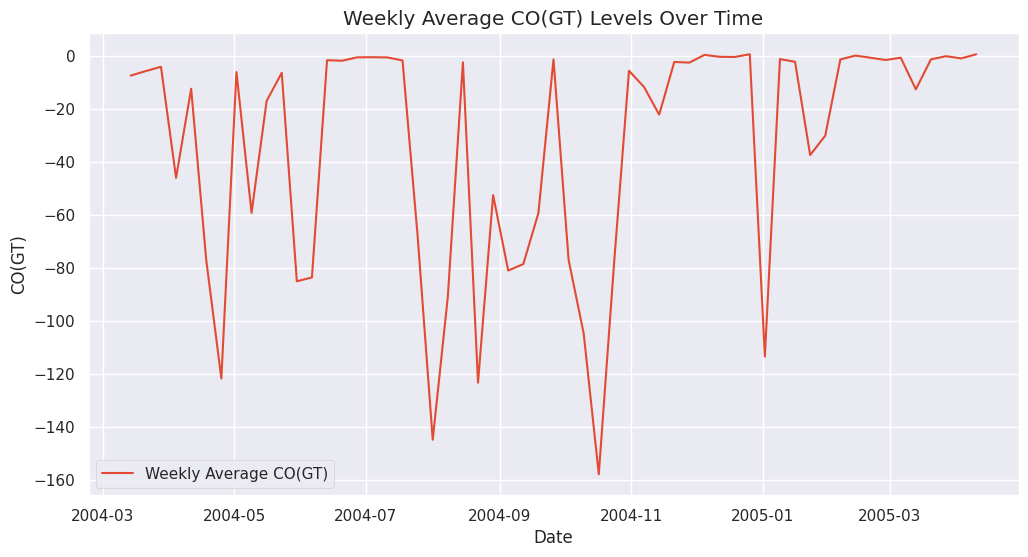

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns
# Resample the CO(GT) column to weekly averages
weekly_data = data['CO(GT)'].resample('W').mean()

# Plot the resampled data
plt.figure(figsize=(12, 6))
plt.plot(weekly_data, label='Weekly Average CO(GT)')
plt.title('Weekly Average CO(GT) Levels Over Time')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()

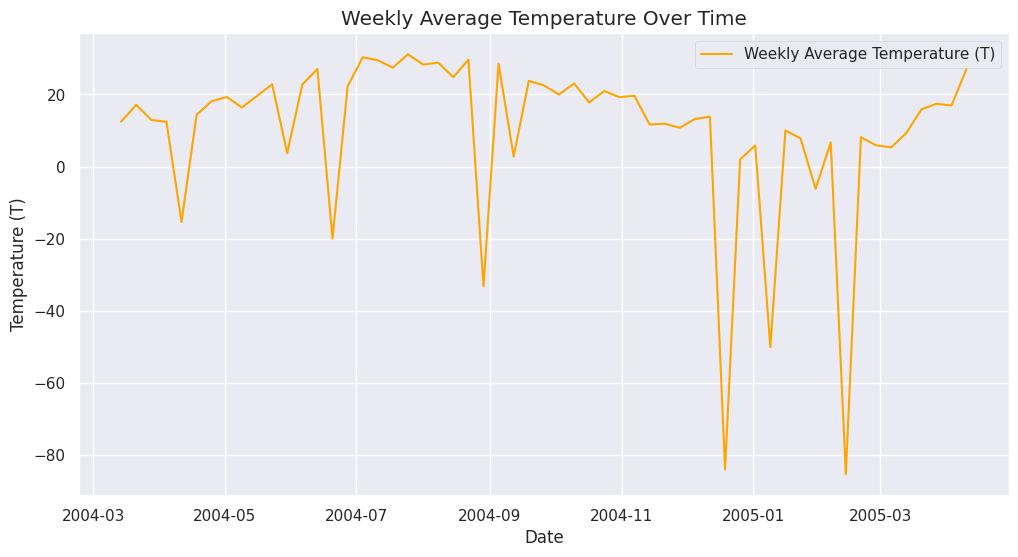

In [14]:
# Resample Temperature (T) to weekly averages and plot
weekly_temp = data['T'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_temp, color='orange', label='Weekly Average Temperature (T)')
plt.title('Weekly Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (T)')
plt.legend()
plt.show()

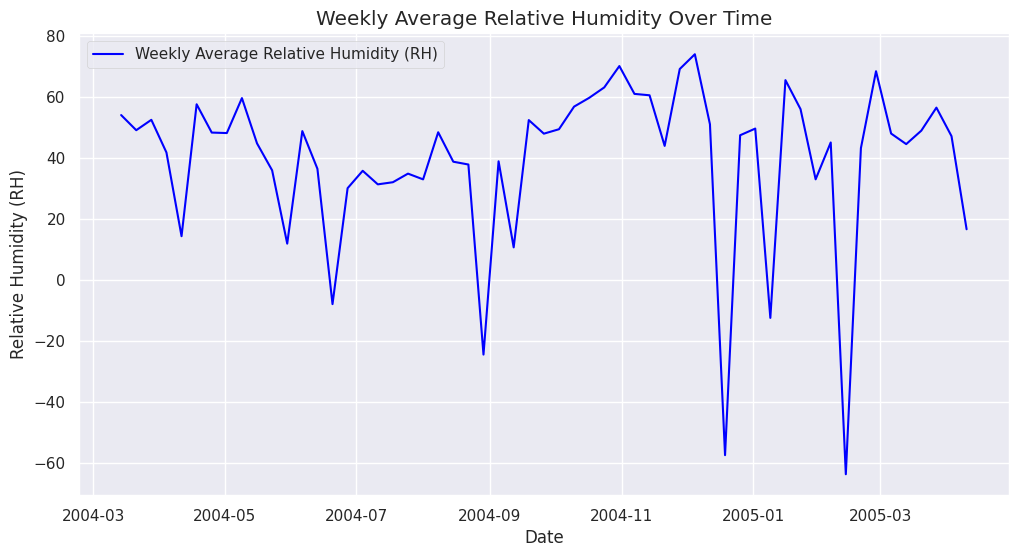

In [15]:
# Resample Relative Humidity (RH) to weekly averages and plot
weekly_humidity = data['RH'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_humidity, color='blue', label='Weekly Average Relative Humidity (RH)')
plt.title('Weekly Average Relative Humidity Over Time')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (RH)')
plt.legend()
plt.show()

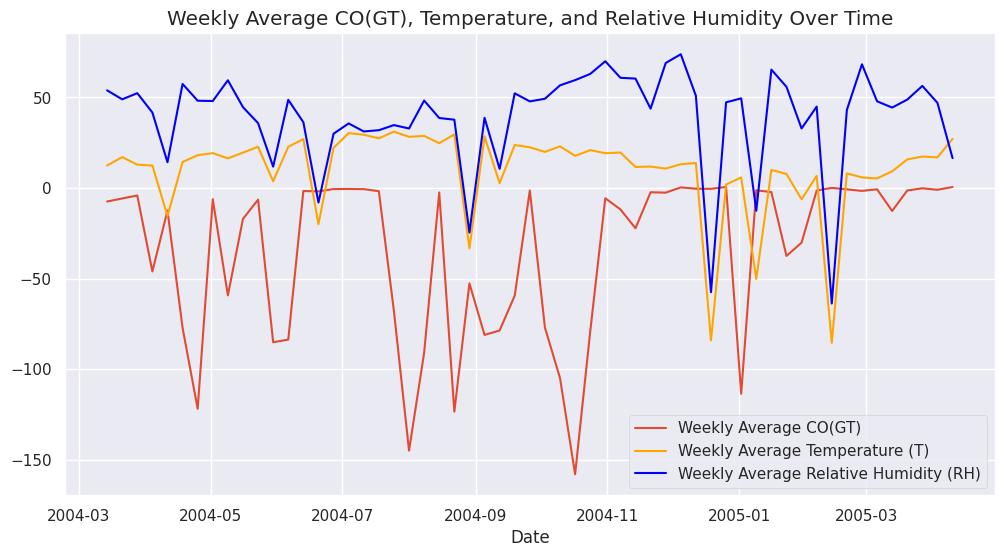

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(weekly_data, label='Weekly Average CO(GT)')
plt.plot(weekly_temp, label='Weekly Average Temperature (T)', color='orange')
plt.plot(weekly_humidity, label='Weekly Average Relative Humidity (RH)', color='blue')
plt.title('Weekly Average CO(GT), Temperature, and Relative Humidity Over Time')
plt.xlabel('Date')
plt.legend()
plt.show()

In [17]:
# Calculate the correlation matrix
correlation_matrix = data[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)',
                           'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']].corr()

# Display the correlation matrix
correlation_matrix

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.00,0.04,0.13,-0.03,0.03,0.53,-0.09,0.67,-0.08,0.08,-0.07,-0.05,-0.04
PT08.S1(CO),0.04,1.00,0.17,0.85,0.93,0.28,0.09,0.15,0.84,0.89,0.75,0.74,0.76
NMHC(GT),0.13,0.17,1.00,0.04,0.11,-0.01,0.05,0.10,0.16,0.10,-0.00,0.01,0.01
C6H6(GT),-0.03,0.85,0.04,1.00,0.77,-0.00,0.51,-0.01,0.77,0.64,0.97,0.92,0.98
PT08.S2(NMHC),0.03,0.93,0.11,0.77,1.00,0.33,-0.08,0.18,0.87,0.91,0.67,0.58,0.65
NOx(GT),0.53,0.28,-0.01,-0.00,0.33,1.00,-0.44,0.82,0.03,0.46,-0.14,-0.06,-0.09
PT08.S3(NOx),-0.09,0.09,0.05,0.51,-0.08,-0.44,1.00,-0.26,0.13,-0.21,0.58,0.57,0.62
NO2(GT),0.67,0.15,0.10,-0.01,0.18,0.82,-0.26,1.00,-0.03,0.25,-0.08,-0.09,-0.06
PT08.S4(NO2),-0.08,0.84,0.16,0.77,0.87,0.03,0.13,-0.03,1.00,0.72,0.75,0.64,0.69
PT08.S5(O3),0.08,0.89,0.10,0.64,0.91,0.46,-0.21,0.25,0.72,1.00,0.50,0.53,0.52


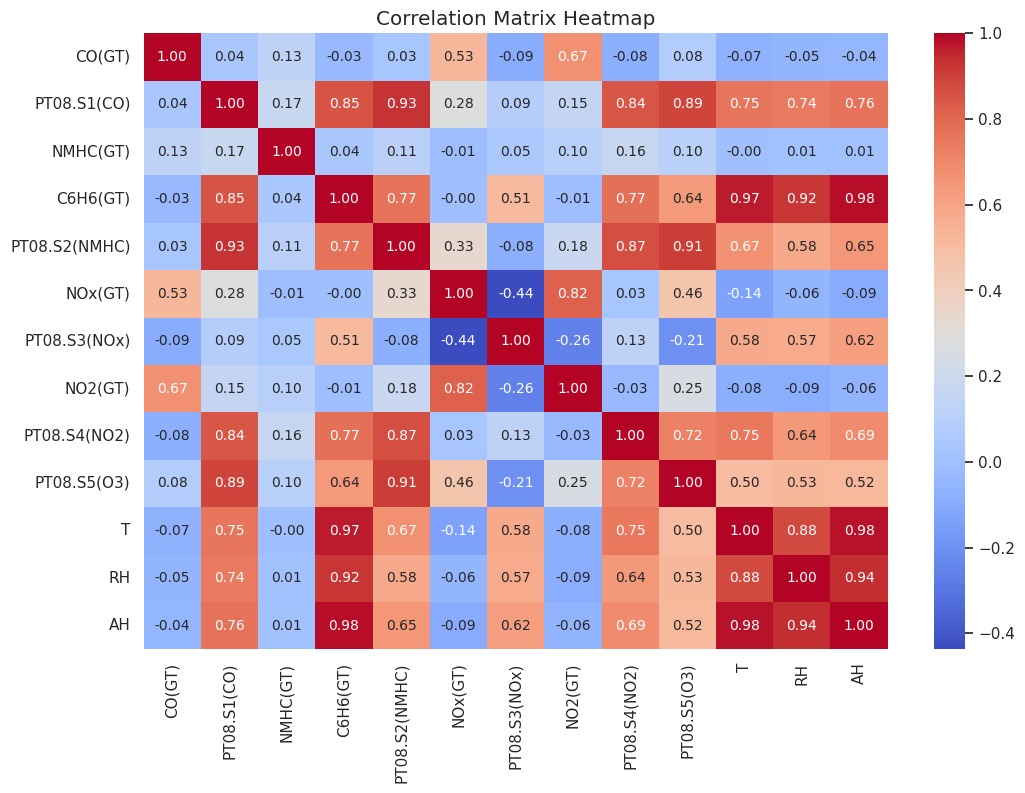

In [18]:
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

##  Anomaly Detection and Clustering

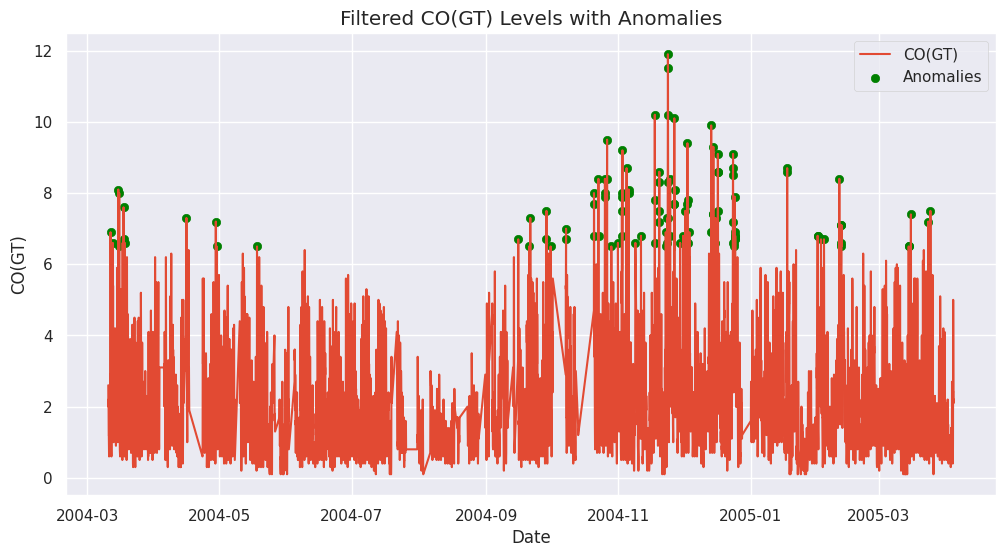

In [21]:
# Set threshold for Z-score anomalies
threshold = 3

# Filter out negative values in CO(GT)
data_filtered = data[data['CO(GT)'] >= 0]

# Recalculate Z-scores for CO(GT) in filtered data
data_filtered['CO_Z_Score'] = (data_filtered['CO(GT)'] - data_filtered['CO(GT)'].mean()) / data_filtered['CO(GT)'].std()

# Redefine anomalies with the Z-score threshold
data_filtered['Anomaly'] = data_filtered['CO_Z_Score'].apply(lambda x: 1 if abs(x) > threshold else 0)

# Plot CO(GT) with anomalies highlighted
plt.figure(figsize=(12, 6))
plt.plot(data_filtered.index, data_filtered['CO(GT)'], label='CO(GT)')
plt.scatter(data_filtered[data_filtered['Anomaly'] == 1].index, data_filtered[data_filtered['Anomaly'] == 1]['CO(GT)'], color='green', label='Anomalies')
plt.title('Filtered CO(GT) Levels with Anomalies')
plt.xlabel('Date')
plt.ylabel('CO(GT)')
plt.legend()
plt.show()

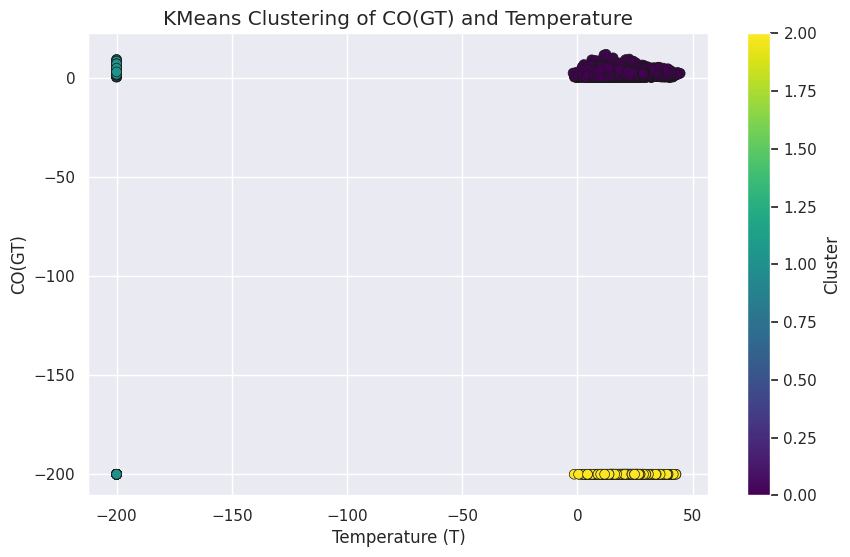

In [22]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['CO(GT)', 'T', 'RH', 'AH']  # Adjust based on correlation insights
data_cluster = data[features].dropna()

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

# Apply KMeans with a predefined number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data_cluster['Cluster'] = kmeans.fit_predict(data_scaled)

# Plot the clusters for CO(GT) vs Temperature
plt.figure(figsize=(10, 6))
plt.scatter(data_cluster['T'], data_cluster['CO(GT)'], c=data_cluster['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('KMeans Clustering of CO(GT) and Temperature')
plt.xlabel('Temperature (T)')
plt.ylabel('CO(GT)')
plt.colorbar(label='Cluster')
plt.show()

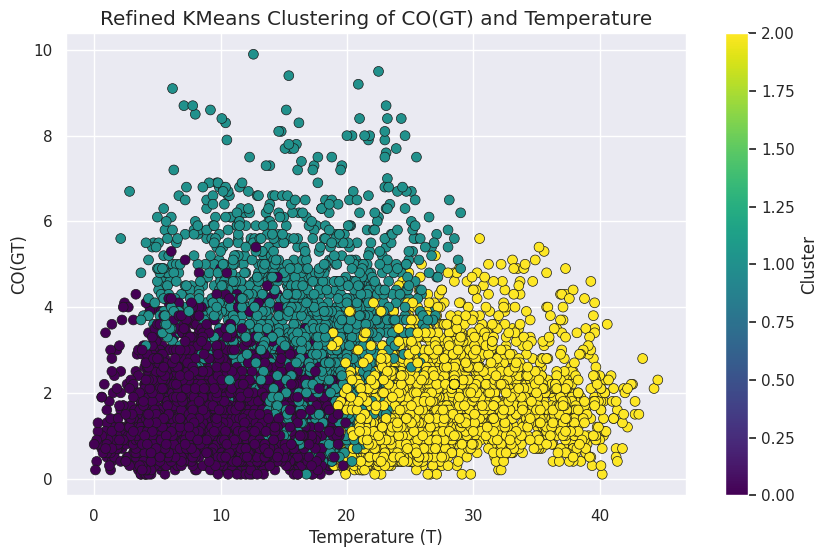

In [23]:
# Define reasonable ranges based on visual inspection or data percentiles
co_gt_range = (-10, 10)  # Example range for CO(GT)
temperature_range = (0, 50)  # Example range for Temperature

# Filter the data
filtered_data = data[(data['CO(GT)'] >= co_gt_range[0]) & (data['CO(GT)'] <= co_gt_range[1]) &
                     (data['T'] >= temperature_range[0]) & (data['T'] <= temperature_range[1])]

# Select features for clustering
features = ['CO(GT)', 'T', 'RH', 'AH']
data_cluster = filtered_data[features].dropna()

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)

# Reapply KMeans with a predefined number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data_cluster['Cluster'] = kmeans.fit_predict(data_scaled)

# Plot the clusters for CO(GT) vs Temperature after filtering
plt.figure(figsize=(10, 6))
plt.scatter(data_cluster['T'], data_cluster['CO(GT)'], c=data_cluster['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Refined KMeans Clustering of CO(GT) and Temperature')
plt.xlabel('Temperature (T)')
plt.ylabel('CO(GT)')
plt.colorbar(label='Cluster')
plt.show()

## Modeling with AutoML using AutoViML


In [37]:
!pip install autoviml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of imbalanced-ensemble to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 746.5/746.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.9/586.9 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/

In [2]:
!pip install scipy==1.7.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 68.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.22.4 which is incompatible.
albumentations 1.4.20 requires scipy>=1.10.0, but you have scipy 1.7.3 which is incompatible.
arviz 0.20.0 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.
a

In [35]:
import pandas as pd
from autoviml.Auto_ViML import Auto_ViML
from sklearn.model_selection import train_test_split

# Reload the dataset
data = pd.read_csv('/content/AirQuality.csv', delimiter=';')
data = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'], errors='ignore')

# Convert Date and Time columns to strings
data['Date'] = data['Date'].astype(str)
data['Time'] = data['Time'].astype(str)

# Specify the format explicitly for date-time conversion
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'], format='%d/%m/%Y %H.%M.%S', errors='coerce')

# Drop rows with NaT in Datetime and set as index
data = data.dropna(subset=['Datetime'])
data = data.set_index('Datetime')

# Verify the shape after date-time conversion
print("After Date-Time Conversion, Shape:", data.shape)
data.head()

After Date-Time Conversion, Shape: (9357, 15)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18.00.00,"2,6","1,360.00",150.00,"11,9","1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00","13,6","48,9","0,7578"
2004-03-10 19:00:00,10/03/2004,19.00.00,2,"1,292.00",112.00,"9,4",955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,"13,3","47,7","0,7255"
2004-03-10 20:00:00,10/03/2004,20.00.00,"2,2","1,402.00",88.00,"9,0",939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00","11,9","54,0","0,7502"
2004-03-10 21:00:00,10/03/2004,21.00.00,"2,2","1,376.00",80.00,"9,2",948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00","11,0","60,0","0,7867"
2004-03-10 22:00:00,10/03/2004,22.00.00,"1,6","1,272.00",51.00,"6,5",836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00","11,2","59,6","0,7888"


In [36]:
# Convert comma decimal separators to periods, then cast columns to numeric
for column in data.columns:
    data[column] = data[column].astype(str).str.replace(',', '.')
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Filter out rows with negative CO(GT) values
data = data[data['CO(GT)'] >= 0]

# Verify the data after filtering
print("After Filtering Negative CO(GT), Shape:", data.shape)
data.head()

After Filtering Negative CO(GT), Shape: (7674, 15)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,NaN,NaN,2.60,"1,360.00",150.00,11.90,"1,046.00",166.00,"1,056.00",113.00,"1,692.00","1,268.00",13.60,48.90,0.76
2004-03-10 19:00:00,NaN,NaN,2.00,"1,292.00",112.00,9.40,955.00,103.00,"1,174.00",92.00,"1,559.00",972.00,13.30,47.70,0.73
2004-03-10 20:00:00,NaN,NaN,2.20,"1,402.00",88.00,9.00,939.00,131.00,"1,140.00",114.00,"1,555.00","1,074.00",11.90,54.00,0.75
2004-03-10 21:00:00,NaN,NaN,2.20,"1,376.00",80.00,9.20,948.00,172.00,"1,092.00",122.00,"1,584.00","1,203.00",11.00,60.00,0.79
2004-03-10 22:00:00,NaN,NaN,1.60,"1,272.00",51.00,6.50,836.00,131.00,"1,205.00",116.00,"1,490.00","1,110.00",11.20,59.60,0.79


##############  D A T A   S E T  A N A L Y S I S  #######################
Training Set Shape = (6139, 13)
    Training Set Memory Usage = 0.66 MB
Test Set Shape = (1535, 12)
    Test Set Memory Usage = 0.15 MB
Single_Label Target: ['CO(GT)']

################ Regression VISUALIZATION Started #####################
No shuffling of data set before training...
    Using RandomizedSearchCV for Hyper Parameter Tuning. This is 3X faster than GridSearchCV...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  12
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boole

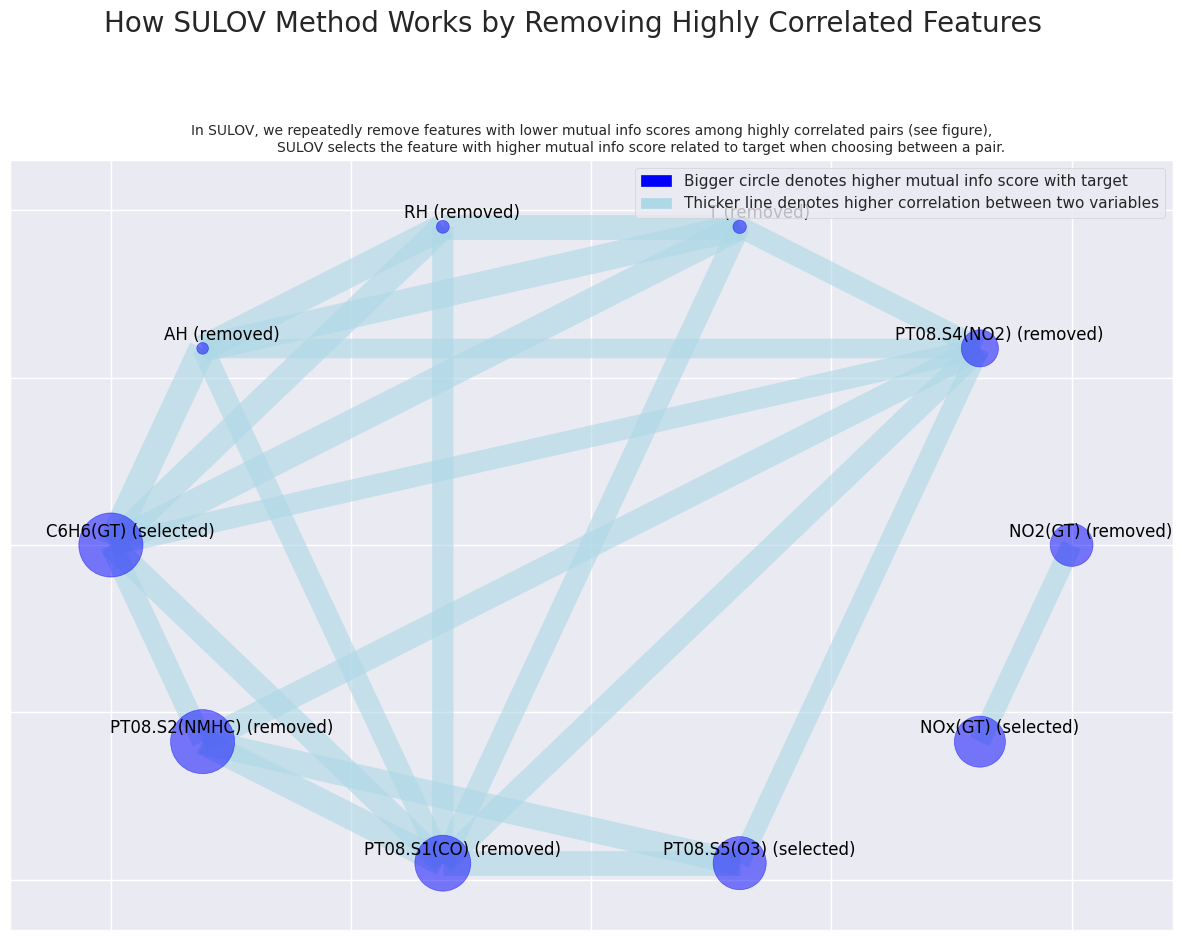

Splitting selected features into float and categorical (integer) variables:
    (5) float variables ...
    (0) categorical vars...
###############################################################################
#######     F E A T U R E   S E L E C T I O N    BY   X G B O O S T    ########
###############################################################################
Current number of predictors = 5 
    Finding Important Features using Boosted Trees algorithm...
        using 5 variables...
        using 3 variables...
Found 5 important features
    Performing limited feature engineering for binning, add_poly and KMeans_Featurizer flags  ...
    Train CV Split completed with TRAIN rows =  4911 , CV rows =  1228
    Binning_Flag set to False or there are no float vars in data set to be binned
    KMeans_Featurizer set to False or there are no float variables in data
Performing MinMax scaling of train and validation data
################################################################

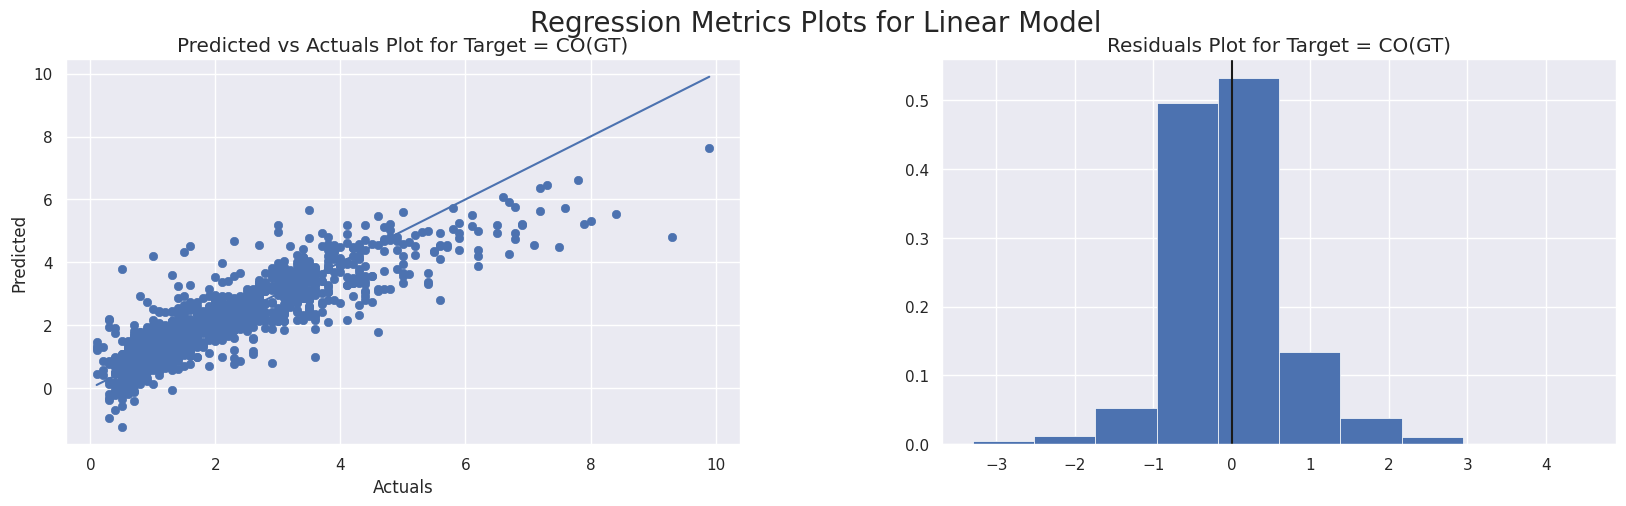

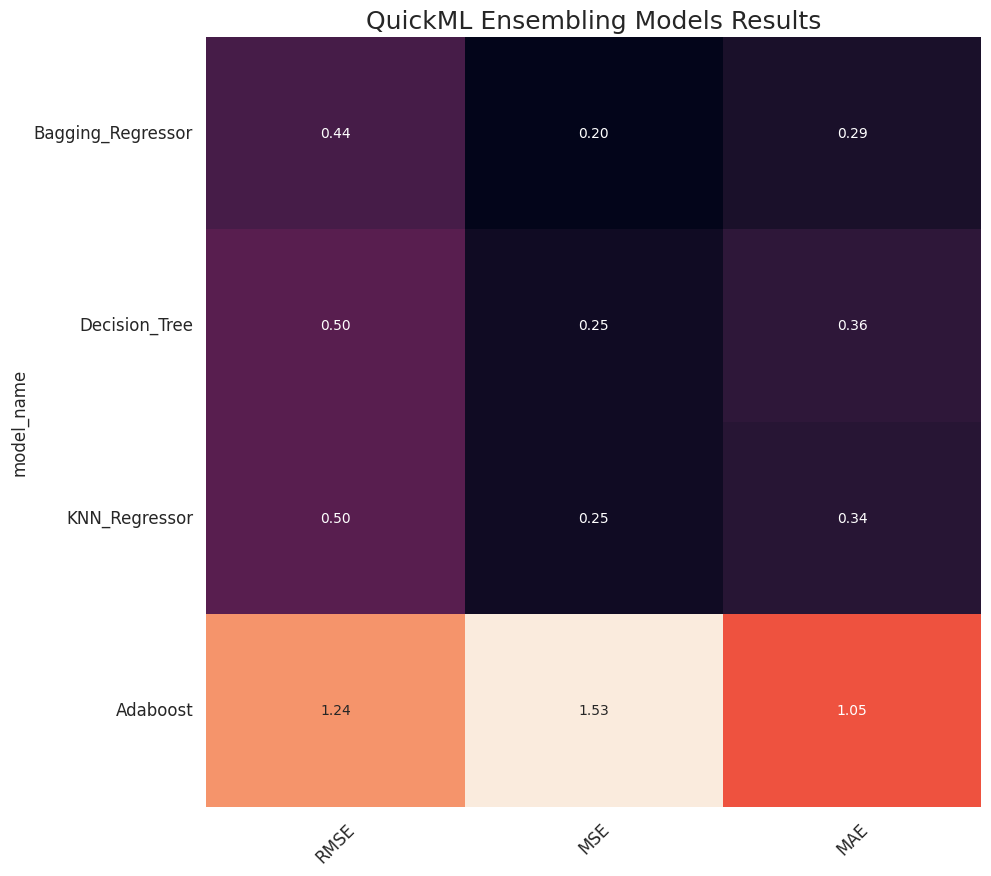

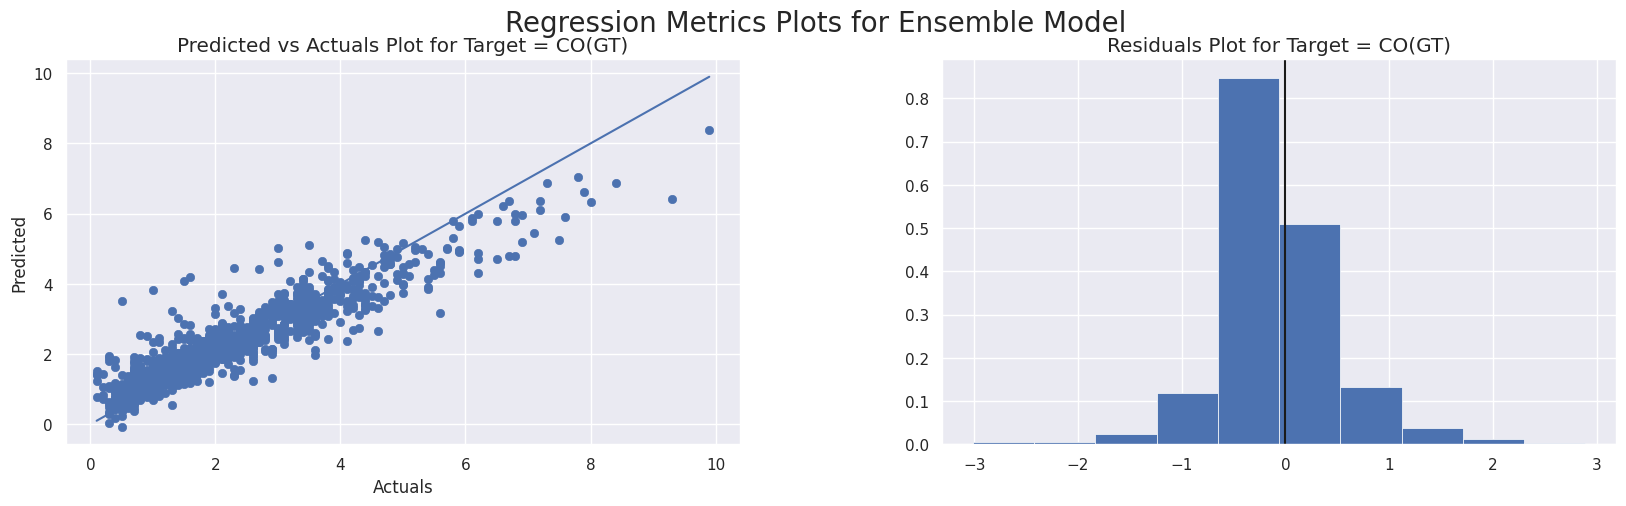

<Figure size 1500x500 with 0 Axes>

In [37]:
from autoviml.Auto_ViML import Auto_ViML
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
data = data.drop(columns=['Date', 'Time'], errors='ignore')

# Define target variable and features
target = 'CO(GT)'
X = data.drop(columns=[target], errors='ignore')
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare combined training DataFrame for AutoViML
train_data = X_train.copy()
train_data[target] = y_train

# Run AutoViML
model, features, trainm, testm = Auto_ViML(
    train=train_data,         # Training data with target included
    target=target,            # Target variable name
    test=X_test,              # Test data (features only)
    sample_submission=None,   # Not needed
    hyper_param='RS',         # Random search for hyperparameter tuning
    feature_reduction=True,   # Enable feature reduction
    scoring_parameter='rmse', # Scoring metric
    verbose=1
)